In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns, pandas as pd, numpy as np, random, os
os.chdir('/Users/timmrahrt/Desktop/Handbook/Machine_Learning_Guide/ZDatasets')

random.seed(1000)
plt.rcParams['figure.figsize'] = (5,3)

# 1. What is clustering?
- Process of grouping items with similar characteristics
- Items in groups similar to each other than in other groups
- Example: Distance between points on a 2D plane

### 1.1 Basics of cluster analysis
- A group of items with similar characteristics
- Customer Segments
- Clustering algorithms: Hierarchical clustering, K-Means, DBSCAN, Gaussian Methods

#### Hierarchical clustering in SciPy

In [85]:
from scipy.cluster.hierarchy import linkage, fcluster
# Create the dataframe
x_coordinates = [80.1, 93.1,86.6,98.5,86.4,9.5,15.2,3.4,
                 10.4,20.3,44.2,56.8,49.2,44.0]
y_coordniates = [87.2,96.1,95.6,92.4,92.4,57.7,49.4,
                 47.3,59.1,55.5,2.1,10.9,24.1,10.3]
df_1 = pd.DataFrame({'x_coordinate':x_coordinates,
                   'y_coordinate':y_coordniates})

'linkage()' builds hierarchical tree using Ward's minimum-variance clustering:
- Starts by treating each point as its own cluster
- Then it iteratively merges the two most similar clusters
- Continuous until everything is merged into one big cluster
- 'ward' is how the similarity is measured: Merges clusters such that, at each step, the increase in total _within-cluster_ variance is minimized.

In [86]:
Z = linkage(df_1, 'ward')
Z[:5]

array([[ 5.        ,  8.        ,  1.6643317 ,  2.        ],
       [ 2.        ,  4.        ,  3.20624391,  2.        ],
       [ 1.        ,  3.        ,  6.54599114,  2.        ],
       [ 6.        ,  9.        ,  7.95110055,  2.        ],
       [10.        , 13.        ,  8.20243866,  2.        ]])

'fcluster' cuts the hierarchical tree into final cluster assignments, parameter:
- Z: Uses the previously computed linkage tree
- 3: Desired number of clusters
- criterion='maxclust': From exactly 3 clusters

In [87]:
# Cut the tree to produce 3 clusters
df_1['cluster_labels'] = fcluster(Z, 3, criterion='maxclust')

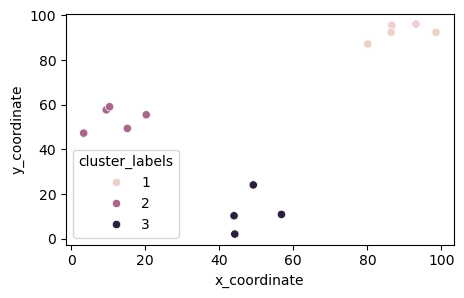

In [88]:
sns.scatterplot(x='x_coordinate', y='y_coordinate', hue = 'cluster_labels',data=df_1)
plt.show()

#### K-Means clustering in SciPy
1. You choose k - the number of clusters upfront
2. The algorithm randomly selects k initial centroids
3. Each data point is assigned to the nearest centroid
4. For each cluster, a new centroid is computed
5. Reassign points to the new centroids
6. Algorithm stops when centorids no longer move significantly

In [89]:
from scipy.cluster.vq import kmeans, vq
# Use the same dataset
x_coordinates = [80.1, 93.1,86.6,98.5,86.4,9.5,15.2,3.4,
                 10.4,20.3,44.2,56.8,49.2,44.0]
y_coordniates = [87.2,96.1,95.6,92.4,92.4,57.7,49.4,
                 47.3,59.1,55.5,2.1,10.9,24.1,10.3]
df = pd.DataFrame({'x_coordinate':x_coordinates,
                   'y_coordinate':y_coordniates})

'vq()' compares each observation to each centroid, assigns the point to the closest centroid.

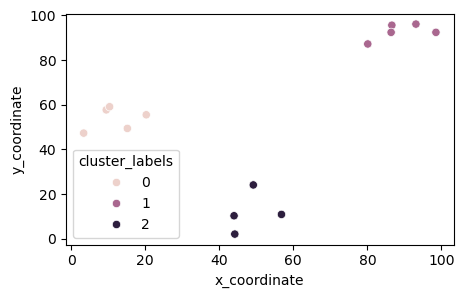

In [90]:
# Use KMeans
centroids,_ = kmeans(df,3)
df['cluster_labels'], _ = vq(df, centroids)
sns.scatterplot(x='x_coordinate', y='y_coordinate', hue='cluster_labels', data=df)
plt.show()

### 1.2 Data preparation for cluster analysis
- Data in raw form may lead to bias in clustering
- Clusters may be heavily dependent on one variable
- Solution: Normalization of individual variables

#### Normalization of data
Process of rescaling data to a standard deviation of 1:

x_new = x / std_dev(x)

In [91]:
from scipy.cluster.vq import whiten
data = [5,1,3,3,2,3,3,8,1,2,2,3,5]
scaled_data = whiten(data)
scaled_data[:5]

array([2.72733941, 0.54546788, 1.63640365, 1.63640365, 1.09093577])

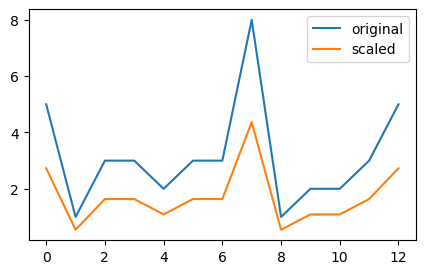

In [92]:
# Illustration: Normalization of data
plt.plot(data, label = 'original')
plt.plot(scaled_data, label = 'scaled')
plt.legend()
plt.show()

# 2. Basics of hierarchical clustering
#### Creating a distance matrix using linkage
_scipy.cluster.hierarchy.linkage_(observation, method = 'single', metric = 'euclidean', optimal_ordering = False)
- 'method': how to calculate the proximity of clusters
1. 'single': based on two closest objects
2. 'complete': based on two farthest objects
3. 'average': based on the arithmetic mean of all objects
4. 'centroid': based on the geometric mean of all objects
5. 'median': based on the median of all objects
6. 'ward': based on the sum of squares
- 'metric': distance metric
- 'optimal_ordering': order data points

#### Create cluster labels with fcluster
_scipy.cluster.hierarchy.fcluster_(distance_matrix, num_clusters, criterion)
- 'distance_matrix': output of 'linkage()' method
- 'num_clusters': number of clusters
- 'criterion': how to decide thresholds to form clusters

## 2.1 Visualise clusters
- Try to make sense of the clusters formed
- An additional step in validation of clusters
- Spot trends in data

### 2.1.1 Scatterplot

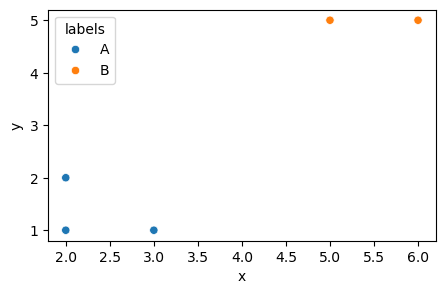

In [93]:
df = pd.DataFrame({'x': [2,3,5,6,2],
                   'y': [1,1,5,5,2],
                  'labels': ['A','A','B','B','A']})

# Visualisation using base Python
#colors = {'A':'red','B':'blue'}
#df.plot.scatter(x='x',y='y',c=df['labels'].apply(lambda x: colors[x]))

# Seaborn
sns.scatterplot(x='x',y='y',hue='labels',data=df)
plt.show()

### 2.1.2 Dendrogram
- Help in showing progressions as clusters are merged
- Is a branching diargram that demonstrates how each cluster is composed by branching out into its child nodes

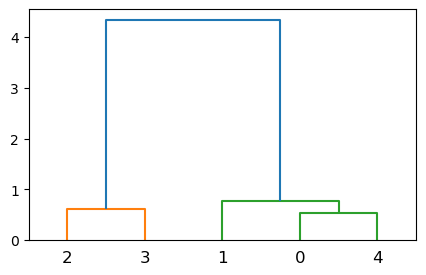

In [94]:
# Example
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.vq import whiten

# Using predefined dataframe: df_1
df['x_whiten'] = whiten(df['x'])
df['y_whiten'] = whiten(df['y'])
# Create the hierarchy tree
Z = linkage(df[['x_whiten', 'y_whiten']], method = 'ward', metric = 'euclidean')
# Create a dendrogram
dn = dendrogram(Z)
plt.show()

- Each original data point starts as its own cluster at height = 0
- _Small merge_: Merge of points 2 and 3 at height 0.6 -> They are very similar (small distnace)
- _Small merge_: Merge of points 0 and 4 at height 0.5 -> Also very similar (small distance)
- _Medium merge_: Merge of point 1 and cluster {0,4} at height 0.8 -> 1 is somewhat close to {0,4}, but not as close as 0 to 4 are to each other. This forms a cluster {0, 4, 1}
- _Big merge_: The cluster on the left {2,3} merges with the cluster on the right {0,4,1} at height 4.4 -> That's very high compared to the small merges, meaning the two groups are quite different
- To decide cluster count, draw a horizontal line and count how many vertical branches it cuts

### Limitations of hierarchical clustering
- Increasing runtime with data points
- Quadratic increase of runtime
- Not feasible for large datasets

In [95]:
from scipy.cluster.hierarchy import linkage
import pandas as pd, random, timeit
points = [100, 1000, 5000, 10000]
time_it_results = {}

for i in range(0, len(points)):
    df_new = pd.DataFrame({'x': random.sample(range(0,points[i]), points[i]),
                           'y': random.sample(range(0,points[i]), points[i])})
    t = timeit.timeit(lambda: linkage(df_new[['x','y']], method='ward',metric='euclidean'), number=1)
    time_it_results[points[i]] = t
print(time_it_results)

{100: 0.0009412920044269413, 1000: 0.011227208000491373, 5000: 0.28966012499586213, 10000: 1.3680886250076583}


Results are {'data points': 'runtime in seconds'}.

# 3. Basics of k-means clustering
- K-Means runs significantly faster on large datasets

### Step 1: Generate cluster centers

<b>_kmeans_(obs, k_or_guess, iter, thresh, check_finite)</b>

- 'obs': standardised observations
- 'k_or_guess': number of clusters
- 'iter': number of iterations (default: 20) 
- 'thres': threshold (default: 1e-05)
- 'check_finite': whether to check if observations contain only finite numbers (default: True)

Returns two objects: cluster centers, mean distortion

Distortion = Sum of squares of distances of points from cluster centers

### Step 2: Generate cluster labels

<b>_vq_(obs, code_book, check_finite = True)</b>

- 'obs': standardised observations
- 'code_book': cluster centers
- 'check_finite': whether to check if observations contain only finite numbers (default: True)

Returns two objects: a list of cluster labels, a list of distortions

In [96]:
df_1

,x_coordinate,y_coordinate,cluster_labels
0,80.1,87.2,1
1,93.1,96.1,1
2,86.6,95.6,1
3,98.5,92.4,1
4,86.4,92.4,1
5,9.5,57.7,2
6,15.2,49.4,2
7,3.4,47.3,2
8,10.4,59.1,2
9,20.3,55.5,2


                x_coordinate  y_coordinate
cluster_labels                            
0                      48.55         11.85
1                      11.76         53.80
2                      88.94         92.74


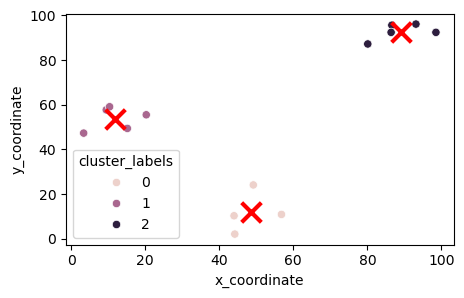

In [97]:
# Running k-means
from scipy.cluster.vq import kmeans, vq
# Generate cluster centers and labels
cluster_centers, _ = kmeans(df_1[['x_coordinate', 'y_coordinate']],3)
df_1['cluster_labels'], _ = vq(df_1[['x_coordinate', 'y_coordinate']], cluster_centers)
# Display cluster centres
print(df_1[['x_coordinate','y_coordinate','cluster_labels']].groupby('cluster_labels').mean())
# Plot
sns.scatterplot(x='x_coordinate',y='y_coordinate', hue='cluster_labels', data=df_1)
plt.scatter(x=cluster_centers[:,0], y=cluster_centers[:,1], marker='x', s=200, linewidth=3, color='red')
plt.show()

## 3.1 How to find the amount of clusters
Elbow Method: Plot of the number of clusters and distortion:
- Helps indicate number of clusters present in data
- Does not always give an indication of optimal k (numbers of clusters)

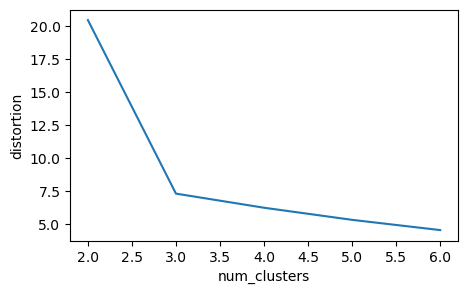

In [98]:
# Declaring variables to use
distortions = []
num_clusters = range(2,7)

# Populating distortions for various clusters
for i in num_clusters:
    centroids, distortion = kmeans(df_1[['x_coordinate','y_coordinate']], i)
    distortions.append(distortion)
    
# Plotting elbow plot data
elbow_plot_data = pd.DataFrame({'num_clusters': num_clusters,
                                'distortion': distortions})
sns.lineplot(x='num_clusters', y='distortion', data=elbow_plot_data)
plt.show()

### Limitations of k-means clustering
- How to find the right _K_ (number of clusters)?
- Impact of seeds: Set a random seed _random.seed(123)_
- Biased towards equal sized clusters

# 4. Dominant colors in images - Start of Computer Vision
- All images consist of pixels
- Each pixel has three values: Red, Green and Blue
- Pixel color: Combination of these RGB values
- k-means can be performed on standardised RGB values to find cluster centers

### 4.1 Tools to find dominant colors
- Convert images to pixels: _matplotlib.image.imread_
- Display colors of cluster centers: _matplotlib.pyplot.imshow_

In [106]:
import matplotlib.image as img
batman_image = img.imread('batman.jpg')
# Store RGB values of all pixels in list r, g and b
r = []
g = []
b = []

print(batman_image.shape)

for pixel in batman_image:
    for temp_r, temp_g, temp_b in pixel:
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)

(464, 736, 3)


In [111]:
# Create dataframe
batman_df = pd.DataFrame({'r':r, 'g':g, 'b':b})
print(batman_df.shape)
# Find standard deviation
#r_std, g_std, b_std = batman_df[['']]

(341504, 3)


In [ ]:
# Let's find out how many dominant colors
distortions = []
num_clusters = range(1,7)
# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(batman_df)